In [2]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
print("EJERCICIO 1")
pd.set_option('display.max_columns', None)

movies = pd.read_csv('movies.csv', encoding='cp1252')
movies.describe()

EJERCICIO 1


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,249876.829300,1.855163e+07,5.673793e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600
std,257380.109004,3.662669e+07,1.495854e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12286.500000,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000
50%,152558.000000,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000
75%,452021.750000,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000


EJERCICIO 3


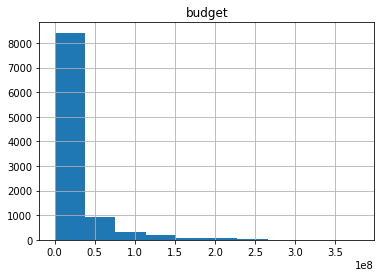

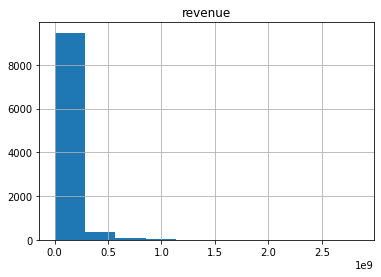

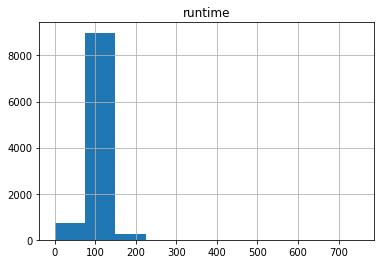

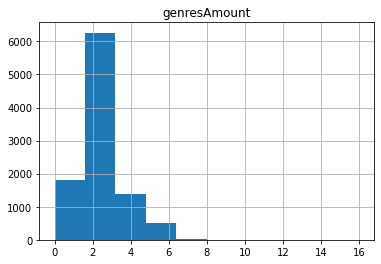

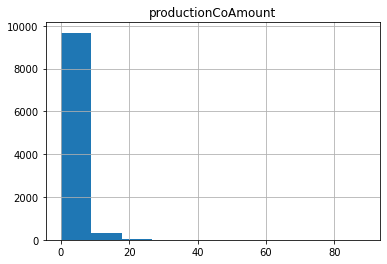

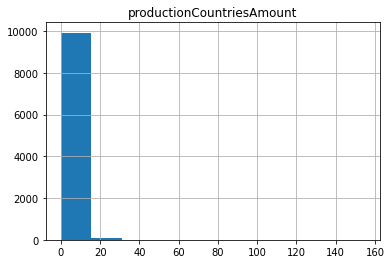

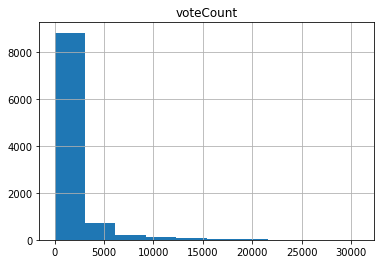

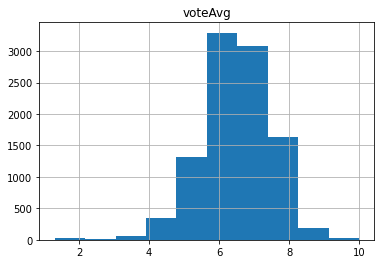

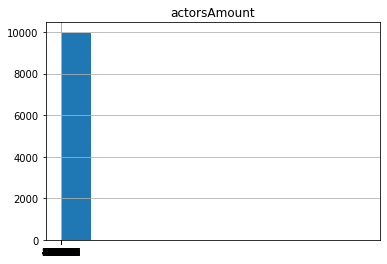

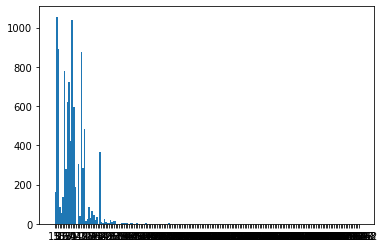

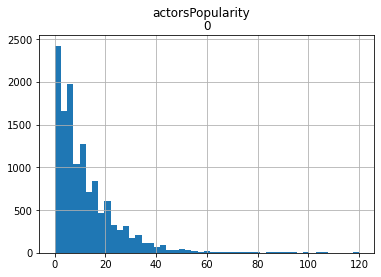

In [13]:
cuantitativas = ['budget', 'revenue', 'runtime', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'voteCount', 'voteAvg', 'actorsAmount']
cuantitativasEspeciales = ['actorsPopularity']
cuantitativasConErrores = ['castWomenAmount', 'castMenAmount']
cualitativas = ['id', 'popularity', 'originalTitle', 'originalLanguage', 'title', 'homePage', 'video', 'releaseDate']
cualitativasEspeciales = ['genres', 'productionCompany', 'productionCompanyCountry', 'productionCountry']
print("EJERCICIO 3")    
for col in cuantitativas:
    movies.hist(column=col)

cuantitativasConErrores = ["castMenAmount"]
for col in cuantitativasConErrores:
    newArray = [i for i in movies[col].to_numpy() if i.isnumeric()]
    plt.hist(newArray, bins="auto")
    plt.show()
    
cuantitativasConErrores = ["castWomenAmount"]
for col in cuantitativasConErrores:
    newArray = [i for i in movies[col].to_numpy() if i.isnumeric()]
    plt.hist(newArray, bins="auto")
    plt.show()
    
for col in cuantitativasEspeciales:
    df = pd.DataFrame(movies[col].str.split('|', expand=True).stack().value_counts())
    df.hist(column=0, bins=np.linspace(0,120))
    plt.suptitle(col)

In [9]:
for col in cualitativasEspeciales:
    df = pd.DataFrame(movies[col].str.split('|', expand=True).stack().value_counts())
    print(df)
    
for col in cualitativas:
    df = movies[col].value_counts()
    print(df)

                    0
Drama            3789
Comedy           3018
Action           2632
Thriller         2565
Adventure        1769
Horror           1512
Animation        1460
Romance          1428
Family           1407
Fantasy          1284
Science Fiction  1267
Crime            1225
Mystery           804
History           406
Music             315
Documentary       299
TV Movie          276
War               275
Western           120
                         0
Warner Bros. Pictures  480
Universal Pictures     466
Columbia Pictures      347
Paramount              320
20th Century Fox       310
...                    ...
Production Group         1
C.R.C.                   1
Cardinal Pictures        1
Artisti Associati        1
Elefantec Global         1

[10142 rows x 1 columns]
        0
US  12675
     7735
JP   1604
FR   1478
GB   1413
..    ...
SK      1
XC      1
PY      1
SI      1
EC      1

[86 rows x 1 columns]
                             0
United States of America  6788
Unite

In [18]:
print("EJERCICIO 4.1")
movies.sort_values(by='budget', ascending=False)[['originalTitle','budget']].head(10)

EJERCICIO 4.1


,originalTitle,budget
716,Pirates of the Caribbean: On Stranger Tides,380000000
4710,Avengers: Age of Ultron,365000000
5952,Avengers: Endgame,356000000
4953,Justice League,300000000
5953,Avengers: Infinity War,300000000
163,Pirates of the Caribbean: At World's End,300000000
607,Superman Returns,270000000
7134,The Lion King,260000000
3791,Tangled,260000000
280,Spider-Man 3,258000000


In [19]:
print("EJERCICIO 4.2")
movies.sort_values(by='revenue', ascending=False)[['originalTitle','revenue']].head(10)

EJERCICIO 4.2


,originalTitle,revenue
3210,Avatar,2.847246e+09
5952,Avengers: Endgame,2.797801e+09
307,Titanic,2.187464e+09
4947,Star Wars: The Force Awakens,2.068224e+09
5953,Avengers: Infinity War,2.046240e+09
4914,Jurassic World,1.671713e+09
7134,The Lion King,1.667635e+09
9049,Spider-Man: No Way Home,1.631853e+09
3397,The Avengers,1.518816e+09
5087,Furious 7,1.515048e+09


In [20]:
print("EJERCICIO 4.3")
movies.sort_values(by='voteCount', ascending=False)[['originalTitle','voteCount']].head(1)

EJERCICIO 4.3


,originalTitle,voteCount
3511,Inception,30788


In [21]:
print("EJERCICIO 4.4")
movies.sort_values(by='voteCount', ascending=True)[['originalTitle','voteCount']].head(1)

EJERCICIO 4.4


,originalTitle,voteCount
9246,Steven Universe: The Movie: Behind the Curtain,1


EJERCICIO 4.5
    Year  RECUENTO
0   2021       816
1   2018       629
2   2017       618
3   2019       612
4   2016       557
..   ...       ...
94  1926         1
95  1922         1
96  1921         1
97  1920         1
98  1902         1

[99 rows x 2 columns]


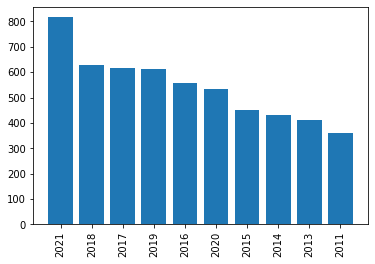

In [22]:
print("EJERCICIO 4.5")
output = sqldf("select strftime('%Y', releaseDate) as Year, Count(releaseDate) as RECUENTO from movies Group By Year Order by RECUENTO DESC")
print(output)
output = sqldf("select * from output limit 10")
plt.bar(output.Year, output.RECUENTO, align='center')
plt.xticks(rotation='vertical')
plt.show()

EJERCICIO 4.6


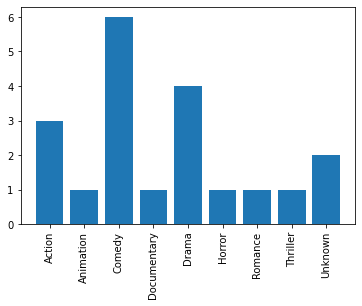

In [23]:
print("EJERCICIO 4.6")
output = sqldf("select *  from movies Order by releaseDate DESC limit 20")
output['genres'] = output['genres'].map(lambda v: v.split('|')[0] if v != None else 'Unknown')
output = sqldf("select genres, count(*) as conteo  from output group by genres")
plt.bar(output.genres, output.conteo, align='center')
plt.xticks(rotation='vertical')
plt.show()

In [24]:
print("EJERCICIO 4.7")
output = sqldf("select genres, (revenue - budget) as GANANCIAS from movies Group By genres Order by GANANCIAS DESC")
output['genres'] = output['genres'].map(lambda v: v.split('|')[0] if v != None else 'Unknown')
#leng = len(output.genres.str.split('|'))
#generos = []
#for i in range(leng):
#    if output.genres.str.split('|')[i] != None: 
#        generos.append(output.genres.str.split('|')[i][0])
#    else:
#        generos.append("None")
#output = output.assign(genres=generos)
#output = sqldf("select genres, SUM(GANANCIAS) As SUMA from output group by genres order by SUMA DESC")
#output = output.explode("genres")
output = sqldf("select genres, SUM(GANANCIAS) from output Group By genres Order by GANANCIAS DESC")
output

EJERCICIO 4.7


,genres,SUM(GANANCIAS)
0,Action,2.137252e+10
1,Family,1.201138e+10
2,Adventure,1.707764e+10
3,Animation,1.396995e+10
4,Drama,8.711303e+09
5,Science Fiction,5.445301e+09
6,Fantasy,8.580629e+09
7,Comedy,8.412351e+09
8,Horror,2.820797e+09
9,Romance,3.142871e+09


EJERCICIO 4.8


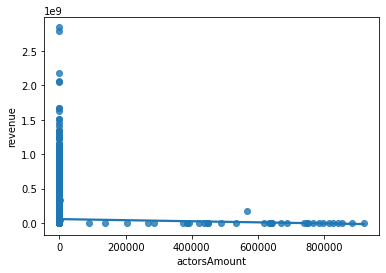

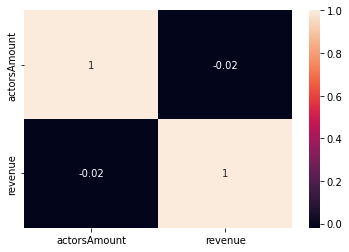

In [25]:
print("EJERCICIO 4.8")
sns.regplot(x=movies["actorsAmount"], y=movies["revenue"])
plt.show()
output = sqldf("select actorsAmount, revenue from movies")
hm = sns.heatmap(output.corr(), annot = True)
plt.show()

EJERCICIO 4.8


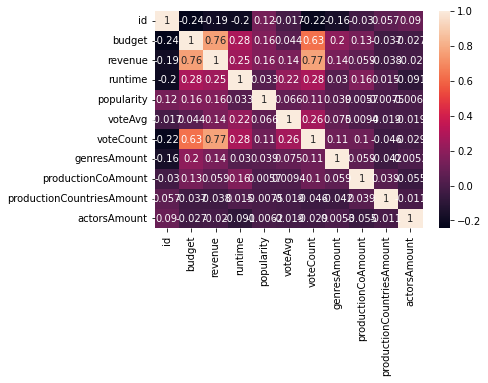

In [26]:
print("EJERCICIO 4.8")
hm = sns.heatmap(movies.corr(), annot = True)
plt.show()

EJERCICIO 4.8 SEGUNDA PREGUNTA


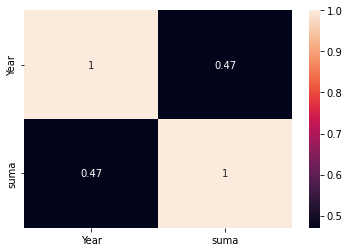

    Year     suma
0   2022       85
1   2021  2601837
2   2020  1509624
3   2019  1290019
4   2018  2451055
5   2017  2220481
6   2016  2290345
7   2015   631392
8   2014   947559
9   2013   770668
10  2012   801031
11  2011   458149
12  2010    96648
13  2009  1061917
14  2008   804616
15  2007     7919
16  2006  2268102
17  2005     6962
18  2004   694445
19  2003     5628


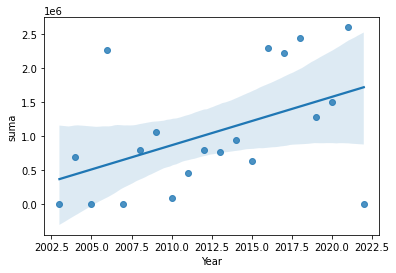

{'whiskers': [<matplotlib.lines.Line2D at 0x22a08fba080>,
 'caps': [<matplotlib.lines.Line2D at 0x22a08fba620>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a08fb9db0>],
 'medians': [<matplotlib.lines.Line2D at 0x22a08fbabc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a08fbae90>],
 'means': []}

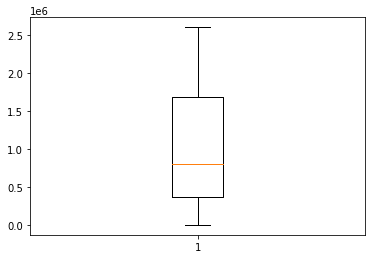

In [3]:
print("EJERCICIO 4.8 SEGUNDA PREGUNTA")
output = sqldf("select CAST(strftime('%Y', releaseDate) as INTEGER) as Year, SUM(actorsAmount) as suma from movies group by Year Order by Year DESC limit 20")
hm = sns.heatmap(output.corr(), annot = True)
plt.show()
print(output)
sns.regplot(x=output["Year"], y=output["suma"])
plt.show()
plt.boxplot(output["suma"])

EJERCICIO 4.9


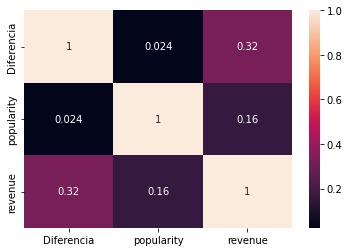

      Diferencia  popularity      revenue
0             -6      20.880    4257354.0
1              6       9.596   12136938.0
2             57     100.003  775398007.0
3             13     134.435  940335536.0
4             30      58.751  677387716.0
...          ...         ...          ...
9995           2      16.662          0.0
9996           0     491.706          0.0
9997           0     565.658          0.0
9998           0       9.664          0.0
9999          -1      83.747     254042.0

[10000 rows x 3 columns]


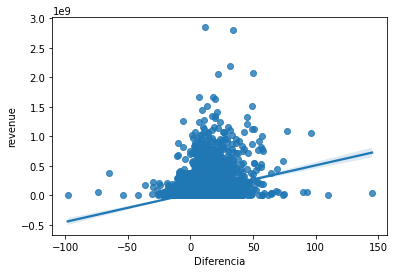

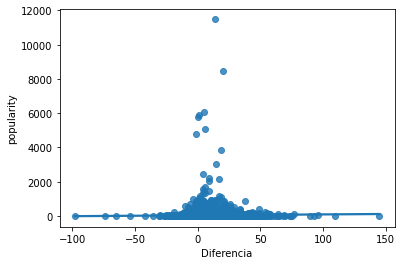

In [28]:
print("EJERCICIO 4.9")
output = sqldf("select castMenAmount, castWomenAmount, popularity, revenue from movies")
output['castMenAmount'] = output['castMenAmount'].apply(lambda x: int(x) if str.isdigit(x) and int(x) < 500  else 0)
output['castWomenAmount'] = output['castWomenAmount'].apply(lambda x: int(x) if str.isdigit(x) and int(x) < 500  else 0)
output = sqldf("select (castMenAmount - castWomenAmount) as Diferencia, popularity, revenue from output")
hm = sns.heatmap(output.corr(), annot = True)
plt.show()
print(output)
sns.regplot(x=output["Diferencia"], y=output["revenue"])
plt.show()
sns.regplot(x=output["Diferencia"], y=output["popularity"])
plt.show()

In [29]:
print("EJERCICIO 4.10")
output = sqldf("select director, voteCount from movies Order By voteCount Desc")
df = pd.DataFrame(output["director"].str.split('|', expand=True).stack())
df.columns = ["director"]
df = sqldf("select distinct director from df limit 20")
df

EJERCICIO 4.10


,director
0,Christopher Nolan
1,Joss Whedon
2,Tim Miller
3,James Cameron
4,James Gunn
5,Anthony Russo
6,Joe Russo
7,David Fincher
8,Quentin Tarantino
9,Jon Favreau


EJERCICIO 4.11


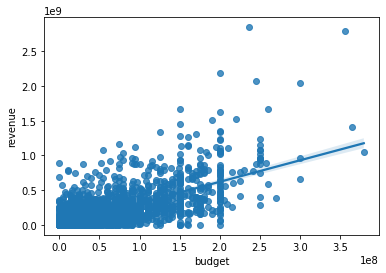

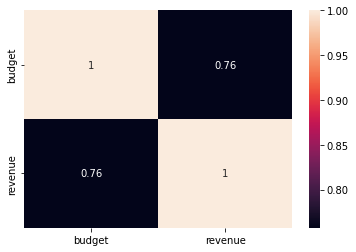

In [30]:
print("EJERCICIO 4.11")
sns.regplot(x=movies["budget"], y=movies["revenue"])
plt.show()
output = sqldf("select budget, revenue from movies")
hm = sns.heatmap(output.corr(), annot = True)
plt.show()

EJERCICIO 4.12


<BarContainer object of 12 artists>

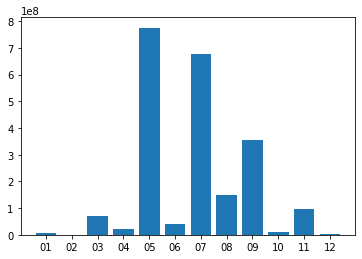

In [31]:
print("EJERCICIO 4.12")
output = sqldf("select strftime('%m', releaseDate) as Month, revenue from movies group by Month")
plt.bar(output.Month, output.revenue, align="center")

In [32]:
print("EJERCICIO 4.12 y 4.13")
maximo = movies["releaseDate"].max()[0:4]
minimo = movies["releaseDate"].min()[0:4]
diferencia = str(int(maximo)-int(minimo))
output = sqldf("Select strftime('%m', releaseDate) as Month, Count(*)/"+diferencia+" as Promedio from movies group by Month")
output

EJERCICIO 4.12 y 4.13


,Month,Promedio
0,01,5
1,02,5
2,03,6
3,04,5
4,05,5
5,06,6
6,07,6
7,08,7
8,09,8
9,10,8


EJERCICIO 4.14


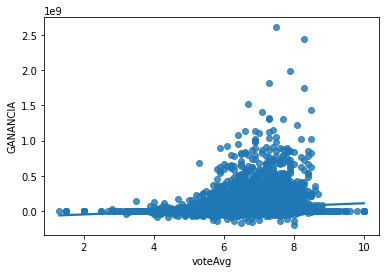

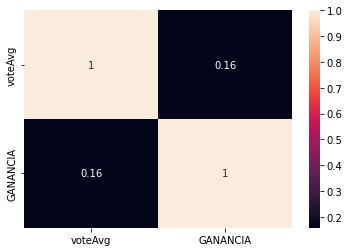

In [33]:
print("EJERCICIO 4.14")
output = sqldf("select voteAvg, (revenue - budget) as GANANCIA from movies")
sns.regplot(x=output["voteAvg"], y=output["GANANCIA"])
plt.show()
hm = sns.heatmap(output.corr(), annot = True)
plt.show()

In [34]:
print("EJERCICIO 4.15")
output = sqldf("select * from movies")
output['genres'] = output['genres'].map(lambda v: v.split('|')[0] if v != None else '')
output = sqldf("select genres, SUM(runtime)/Count(*) as tiempoPromedio from output group by genres order by tiempoPromedio desc")
output

EJERCICIO 4.15


,genres,tiempoPromedio
0,History,122
1,War,120
2,Western,116
3,Drama,111
4,Crime,111
5,Adventure,107
6,Music,104
7,Action,104
8,Science Fiction,103
9,Romance,102
